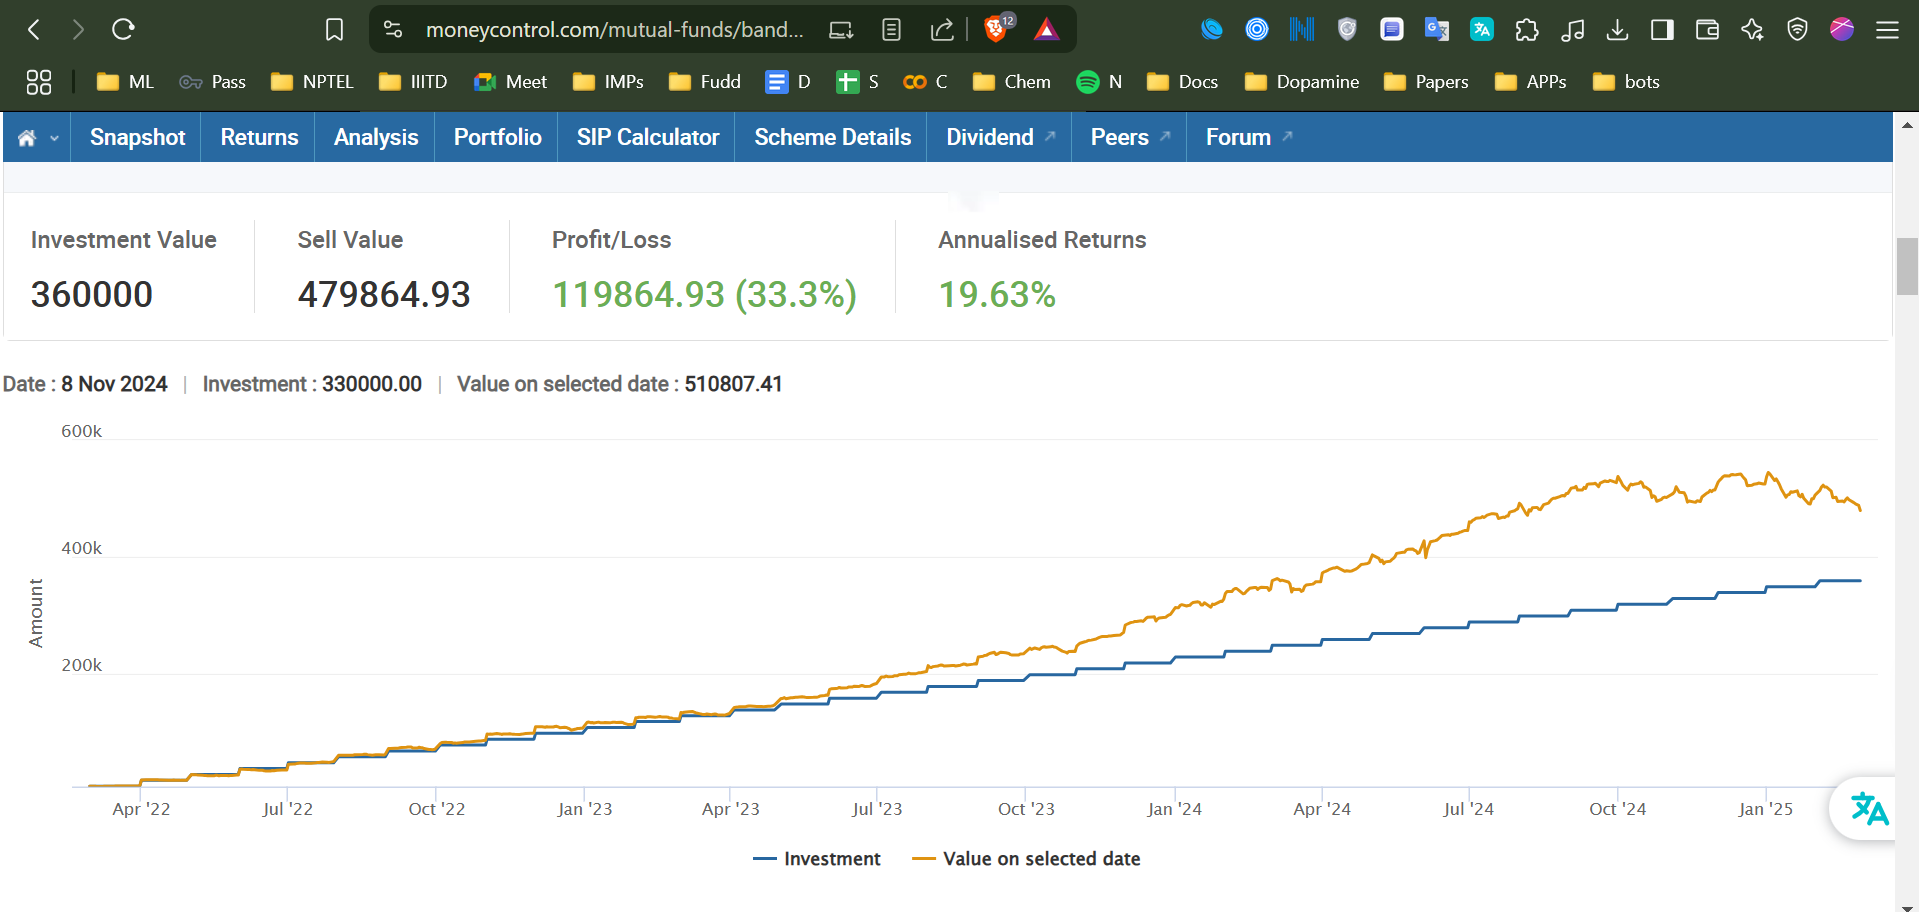

https://www.moneycontrol.com/mutual-funds/bandhan-core-equity-fund-direct-plan-growth/sip-calculator-MAG723.html

In [ ]:
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import numpy as np

# Load NAV data
df = pd.read_csv("/content/data_main.csv")

# Convert NAV Date to datetime and sort
df['NAV Date'] = pd.to_datetime(df['NAV Date'], format='%d-%m-%Y')
df = df.sort_values('NAV Date')

# Filter for range: March 2022 to February 2025
start_date = datetime(2022, 3, 1)
end_date = datetime(2025, 2, 28)
df = df[(df['NAV Date'] >= start_date) & (df['NAV Date'] <= end_date)]

# Get last available NAV of each month
df['Month'] = df['NAV Date'].dt.to_period('M')
monthly_nav = df.groupby('Month').apply(lambda x: x.loc[x['NAV Date'].idxmax()])
monthly_nav.reset_index(drop=True, inplace=True)

# Simulate SIP
sip_amount = 10000
units = []
investment_dates = []
cash_flows = []

for index, row in monthly_nav.iterrows():
    nav = row['NAV (Rs)']
    date = row['NAV Date']
    unit = sip_amount / nav
    units.append(unit)
    investment_dates.append(date)
    cash_flows.append(-sip_amount)  # Outflow

# Final value as of last NAV date
total_units = sum(units)
final_nav = monthly_nav.iloc[-1]['NAV (Rs)']
final_value = total_units * final_nav

# Add final inflow
investment_dates.append(monthly_nav.iloc[-1]['NAV Date'])
cash_flows.append(final_value)

# Calculate XIRR
def xirr(cash_flows, dates):
    def xnpv(rate):
        return sum([cf / (1 + rate) ** ((d - dates[0]).days / 365) for cf, d in zip(cash_flows, dates)])

    from scipy.optimize import newton
    return newton(xnpv, 0.1)

xirr_value = xirr(cash_flows, investment_dates)

# Results
print(f"Total Investment: ₹{sip_amount * len(units):,.2f}")
print(f"Final Value: ₹{final_value:,.2f}")
print(f"Absolute Return: {(final_value / (sip_amount * len(units)) - 1) * 100:.2f}%")
print(f"(XIRR): {xirr_value * 100:.2f}%")


Total Investment: ₹360,000.00
Final Value: ₹473,536.00
Absolute Return: 31.54%
(XIRR): 19.69%


<ipython-input-2-c49efe875ea9>:20: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  monthly_nav = df.groupby('Month').apply(lambda x: x.loc[x['NAV Date'].idxmax()])


In [ ]:
print(monthly_nav['Month'].astype(str).tolist())
print(f"Number of SIPs: {len(monthly_nav)}")


['2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12', '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10', '2024-11', '2024-12', '2025-01', '2025-02']
Number of SIPs: 36
